# IA340 Mini Project
**Project Title:** Supply Chain Greenhouse Gas Emission Factors

## Research Question 
How do greenhouse gas (GHG) emission factors differ across U.S. industry sectors, and which industries have the highest average emissions per dollar of output?

## Additional Research Questions
Which NAICS sectors are the most carbon-intensive?

How do emissions intensities vary across sectors?

Which sectors offer the best opportunities for decarbonization?

## Dataset Documentation
- **Source:** https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-v1-3-by-naics-6
- **Description** This dataset provides supply chain greenhouse gas (GHG) emission factors organized by NAICS 6-digit industry codes. The factors quantify the GHG emissions associated with producing one dollar’s worth of goods or services in different industries. Data is expressed in kilograms of CO₂-equivalent (CO₂e) per dollar output, covering both direct and indirect (supply chain) emissions.
- **Time Period:** The data represents emission factors based on U.S. industry activity and national accounts up to approximately 2018, published in the v1.3 dataset update.
- **Reason for Choice:** The dataset connects environmental and economic data, providing insight into which sectors drive emissions and where mitigation would have the most impact.

# Import Dataset

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "s3://ia-340-2025-fall-riley12345/SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022.csv"
df = pd.read_csv(file_path)
df.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0


**Markdown Explanation:**

This cell imports required Python libraries and loads the EPA dataset directly from the AWS S3 bucket.
The .head() function previews the first few rows to confirm successful loading.

# Inspect Columns and Structure

In [23]:
print("\n--- Column Names ---")
print(df.columns.tolist())

print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Sample Rows ---")
display(df.head(3))


--- Column Names ---
['2017 NAICS Code', '2017 NAICS Title', 'GHG', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Reference USEEIO Code']

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2017 NAICS Code                                1016 non-null   int64  
 1   2017 NAICS Title                               1016 non-null   object 
 2   GHG                                            1016 non-null   object 
 3   Unit                                           1016 non-null   object 
 4   Supply Chain Emission Factors without Margins  1016 non-null   float64
 5   Margins of Supply Chain Emission Factors       1016 non-null   float64
 6   Supply Chain Emiss

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0


**Markdown Explanation:**

Here, I inspect column names, data types, and missing values to understand the dataset’s structure and determine which columns to clean or rename.

# Clean Data

In [24]:
possible_naics_cols = [c for c in df.columns if "NAICS" in c.upper()]
possible_emission_cols = [c for c in df.columns if "EMISSION" in c.upper() or "CO2" in c.upper()]

print("Detected NAICS-like columns:", possible_naics_cols)
print("Detected Emission-like columns:", possible_emission_cols)

naics_col = possible_naics_cols[0]
emission_col = possible_emission_cols[0]

print(f"\nUsing NAICS column: {naics_col}")
print(f"Using Emission column: {emission_col}")

df = df.rename(columns={naics_col: "NAICS_Code", emission_col: "Total_Emission_Factor_kgCO2e_per_dollar"})

df = df.dropna(subset=["NAICS_Code", "Total_Emission_Factor_kgCO2e_per_dollar"])

df["Total_Emission_Factor_kgCO2e_per_dollar"] = pd.to_numeric(
    df["Total_Emission_Factor_kgCO2e_per_dollar"], errors="coerce"
)

df = df.drop_duplicates()

print(df.info())
df.describe()

Detected NAICS-like columns: ['2017 NAICS Code', '2017 NAICS Title']
Detected Emission-like columns: ['Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins']

Using NAICS column: 2017 NAICS Code
Using Emission column: Supply Chain Emission Factors without Margins
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   NAICS_Code                                  1016 non-null   int64  
 1   2017 NAICS Title                            1016 non-null   object 
 2   GHG                                         1016 non-null   object 
 3   Unit                                        1016 non-null   object 
 4   Total_Emission_Factor_kgCO2e_per_dollar     1016 non-null   float64
 5   Margins of Supply Chain Emissio

,NAICS_Code,Total_Emission_Factor_kgCO2e_per_dollar,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins
count,1016.000000,1016.000000,1016.000000,1016.000000
mean,424917.376969,0.264994,0.016945,0.281898
std,164942.113495,0.314768,0.023367,0.321417
min,111110.000000,0.026000,0.000000,0.029000
25%,325588.250000,0.103000,0.000000,0.108000
50%,423700.000000,0.159000,0.000000,0.173000
75%,532111.250000,0.302250,0.030250,0.329250
max,813990.000000,3.846000,0.125000,3.924000


**Markdown Explanation:**

This code automatically detects which columns represent the NAICS code and GHG emission factor, renames them for clarity, and cleans the dataset by:

- Dropping missing values

- Converting data to numeric types

- Removing duplicates

This ensures the dataset is ready for analysis.

# Process / Aggregate

In [25]:
df["NAICS_Sector"] = df["NAICS_Code"].astype(str).str[:2]

sector_summary = (
    df.groupby("NAICS_Sector")["Total_Emission_Factor_kgCO2e_per_dollar"]
      .mean()
      .reset_index()
      .rename(columns={"Total_Emission_Factor_kgCO2e_per_dollar": "Avg_Emission_Factor"})
)

sector_summary.sort_values(by="Avg_Emission_Factor", ascending=False).head(10)

,NAICS_Sector,Avg_Emission_Factor
0,11,0.688484
2,22,0.566500
10,48,0.558240
5,32,0.495155
4,31,0.377425
1,21,0.360857
17,56,0.333045
11,49,0.236571
3,23,0.226226
6,33,0.201487


**Markdown Explanation:**

To analyze emissions by broad sector, I extracted the first two digits of each NAICS code (representing high-level industry categories) and calculated the average emission factor for each.

# Query Data

In [27]:
top10 = sector_summary.sort_values(by="Avg_Emission_Factor", ascending=False).head(10)
top10

,NAICS_Sector,Avg_Emission_Factor
0,11,0.688484
2,22,0.566500
10,48,0.558240
5,32,0.495155
4,31,0.377425
1,21,0.360857
17,56,0.333045
11,49,0.236571
3,23,0.226226
6,33,0.201487


**Markdown Explanation:**

This step isolates the ten most carbon-intensive sectors, helping to identify which parts of the economy contribute most heavily to greenhouse gas emissions.

# Visualizations

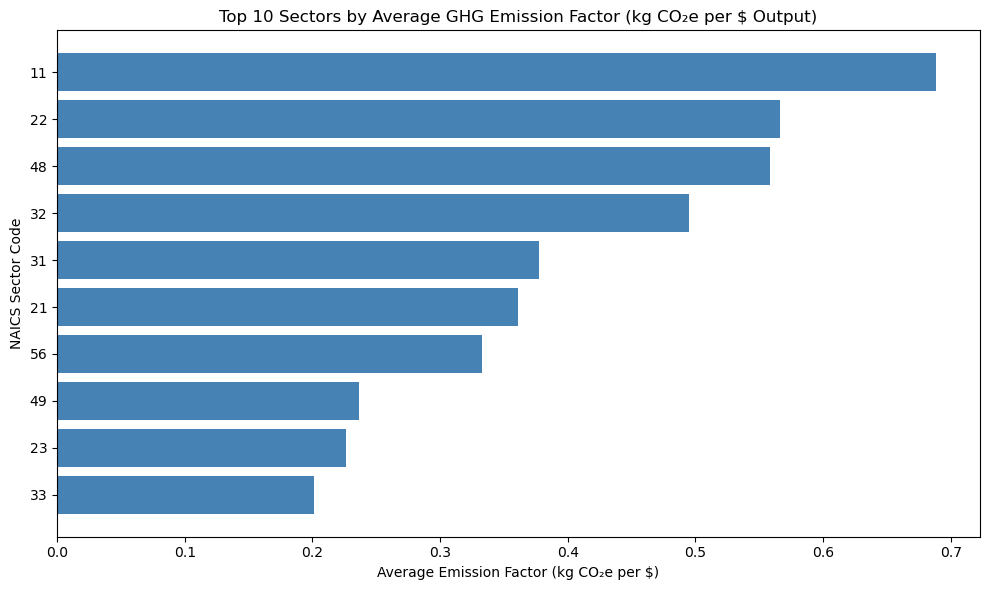

In [28]:
top10 = sector_summary.sort_values(by="Avg_Emission_Factor", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top10["NAICS_Sector"], top10["Avg_Emission_Factor"], color="steelblue")
plt.gca().invert_yaxis()
plt.title("Top 10 Sectors by Average GHG Emission Factor (kg CO₂e per $ Output)")
plt.xlabel("Average Emission Factor (kg CO₂e per $)")
plt.ylabel("NAICS Sector Code")
plt.tight_layout()
plt.show()

**Markdown Explanation:**

This bar chart visualizes the top 10 sectors with the highest average GHG emissions per dollar of economic output.

It highlights which industries are most carbon-intensive and may be prime candidates for decarbonization efforts.

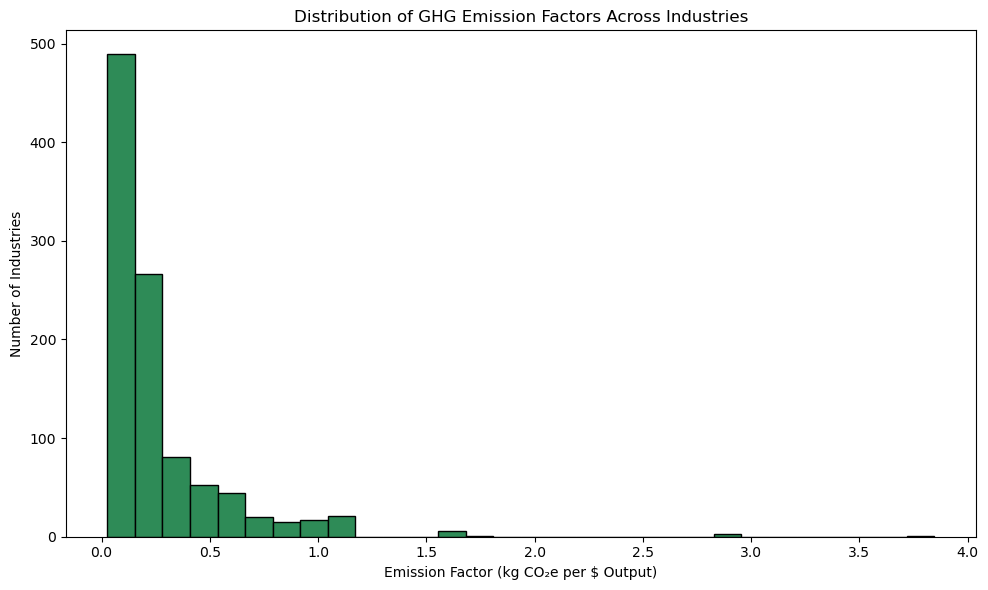

In [20]:
# Histogram of all industries
plt.figure(figsize=(10,6))
plt.hist(df["Total_Emission_Factor_kgCO2e_per_dollar"], bins=30, color="seagreen", edgecolor="black")
plt.title("Distribution of GHG Emission Factors Across Industries")
plt.xlabel("Emission Factor (kg CO₂e per $ Output)")
plt.ylabel("Number of Industries")
plt.tight_layout()
plt.show()

**Markdown Explanation:**

This histogram shows how emission intensities are distributed across all industries.
Most sectors fall within a moderate range, while a few have exceptionally high emissions, indicating where emissions reduction policies could focus.